#### NAME - SHUBHAM  PALTANKAR

### TASK 1 - Prediction using Supervised ML

##### What will be the predicted score if the student studying for 9.25hrs/day?

### Importing the libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [7]:
data = pd.read_csv("C:/Users/SHUBHAM/Desktop/GRIP Project/Book1.csv")
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Getting the information of data 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


As we can see, Datatype of Hours is float64 and Datatype of Scores is int64, and there are no null values.

### Lets plot the data points and find the relationship between number of hours studied and percentage of the score. 

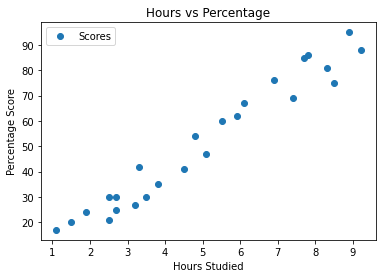

In [9]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the above graph, we can see there is a postive realation between number of hours studied and percentage of score.

### Defining and Splitting the model

In [14]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test ,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

### Training the model

In [19]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


### Fitting Linear Regression Model

In [21]:
import statsmodels.formula.api as smf
model = smf.ols("Scores~Hours",data =data).fit()

### Plotting the regression line

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

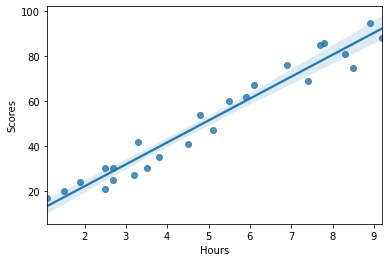

In [26]:
sns.regplot(x = "Hours",y = "Scores",data = data)

### Coefficients

In [32]:
model.params

Intercept    2.483673
Hours        9.775803
dtype: float64

### R squared values

In [37]:
(model.rsquared,model.rsquared_adj)

(0.9529481969048356, 0.9509024663354806)

### Making the Predictions

In [33]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


### Comparing Actual vs Predicted

In [35]:

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


### Error(Mean Absolute Error)

In [39]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.130879918502486


### Predicting the score for 9.25 hours of study

In [38]:
print(regressor.predict([[9.25]]))

[93.89272889]


##### From our Linear Regreesion Model , if students study for 9.25 hours/ day they will score '93.89272889' marks.